# Conjunto de Dados de Câncer de Mama

**Objetivo**: Prever se o câncer é benigno ou maligno.

Os **features** são calculados a partir de uma imagem digitalizada de um *fine needle aspirate* (FNA) de uma massa mamária. Eles descrevem as características dos núcleos celulares presentes na imagem.

**Informações dos Atributos**:

- 1) ID number
- 2) Diagnosis (M = **malignant**, B = **benign**)
- 3-32

Dez **features** de valor real são calculados para cada núcleo da célula:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

**Missing attribute values**: none

**Class distribution**: 357 benign, 212 malignant

Mais detalhes sobre o conjunto de dados você encontra no [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Preparando os Dados

Começaremos a carregar alguns dos módulos que nos ajudarão a organizar e visualizar os dados. Outros módulos serão carregados conforme necessário.

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Primeiramente vamos carregar os dados em um **DataFrame** pandas para melhor trabalharmos.

In [108]:
df = pd.read_csv('dados/breast_cancer.csv')

E agora observamos as primeiras entradas do **DataFrame**.

In [109]:
df.head(8).T

,0,1,2,3,4,5,6,7
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202
diagnosis,M,M,M,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83
perimeter_mean,122.8,132.9,130,77.58,135.1,82.57,119.6,90.2
area_mean,1001,1326,1203,386.1,1297,477.1,1040,577.9
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985


Durante o carregamento do conjunto de dados, uma coluna extra foi criada. 

Usaremos o código abaixo para excluir esta coluna inteira.

In [110]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)

Com a ajuda do Pandas imprimiremos algumas informações básicas sobre o conjunto de dados.

In [111]:
print("O DataFrame possui {0[0]} linhas e {0[1]} colunas".format(df.shape))

O DataFrame possui 569 linhas e 31 colunas


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Como pode ser visto acima, exceto para o diagnóstico (ou seja, `M = maligno` ou `B = benigno`) todas as outras características (**features**) são do tipo float64 e têm 0 números não nulos.

Agora podemos contar quantos diagnósticos são malignos (M) e quantos são benignos (B).

In [113]:
diagnosis_all = list(df.shape)[0]
diagnosis_cat = list(df['diagnosis'].value_counts())

print("Os dados possuem {} diagnósticos, {} malignos e {} benignos.".format(diagnosis_all, diagnosis_cat[0], diagnosis_cat[1]))

Os dados possuem 569 diagnósticos, 357 malignos e 212 benignos.


## Visualizando os Dados

Faremos agora algumas visualizações sobre os dados para que consigamos compreendê-los melhor.

Estamos interessados principalmente nos valores médios (**mean**) dos features, por isso vamos separar esses features na lista a seguir para tornar o trabalho mais fácil e o código mais legível.

In [114]:
features_mean = list(df.columns[1:11])
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

A seguir, usaremos a biblioteca seaborn para criar um **heatmap** das correlações entre os features.

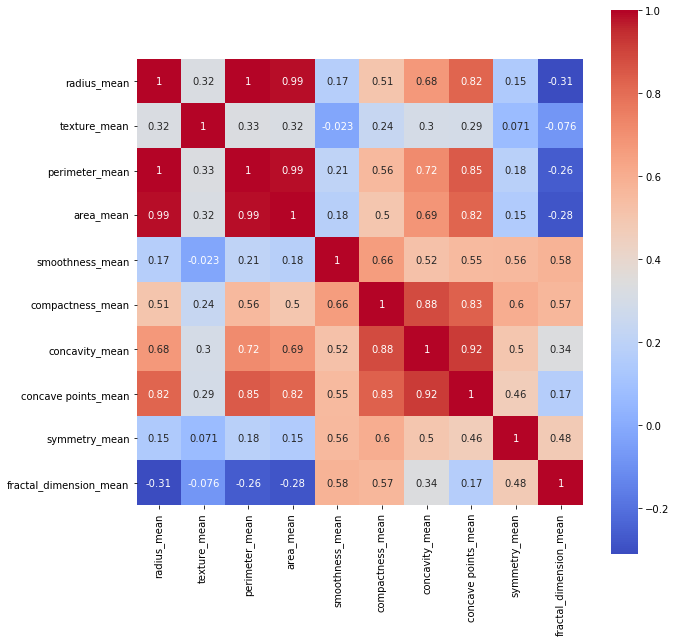

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm');

Também é possível criar uma **matriz de dispersão** com os features. 

Os pontos vermelhos correspondem ao diagnóstico de malignidade e os azuis ao benigno. 

Veja como em alguns casos os pontos vermelhos e azuis ocupam diferentes regiões dos gráficos.

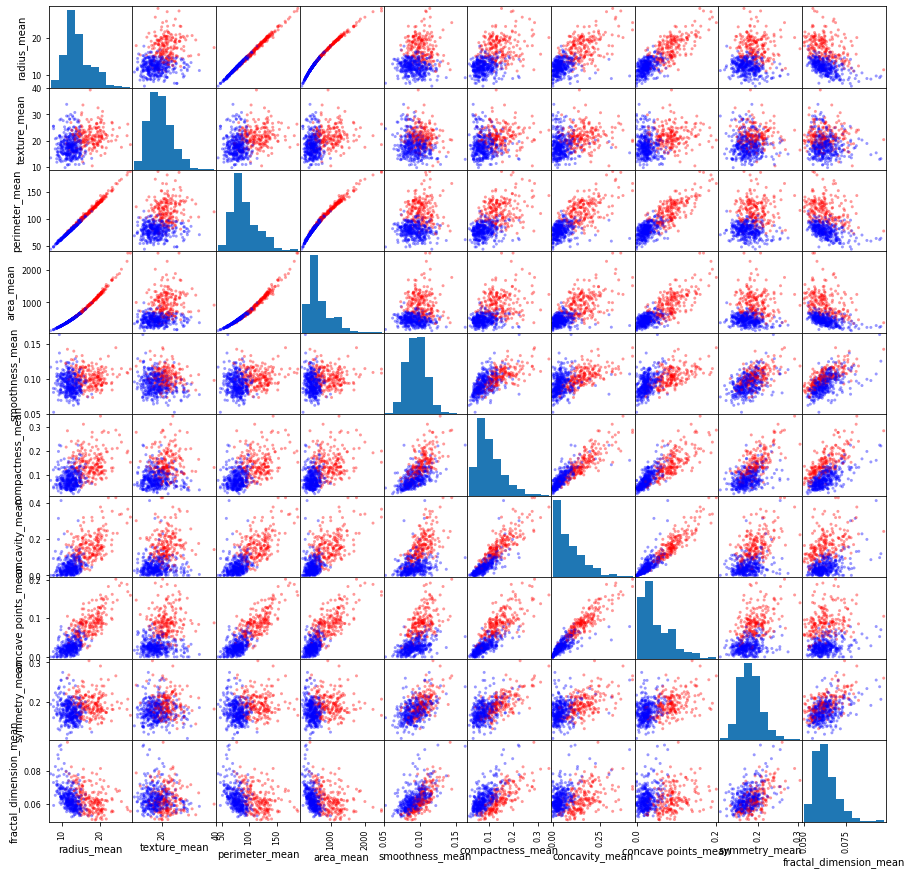

In [116]:
from pandas.plotting import scatter_matrix

color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

Também podemos ver como as células dos tumores malignos ou benignos podem ter (ou não) valores diferentes para as características (features). 

Plotamos a distribuição de cada tipo de diagnóstico para cada uma das características médias.

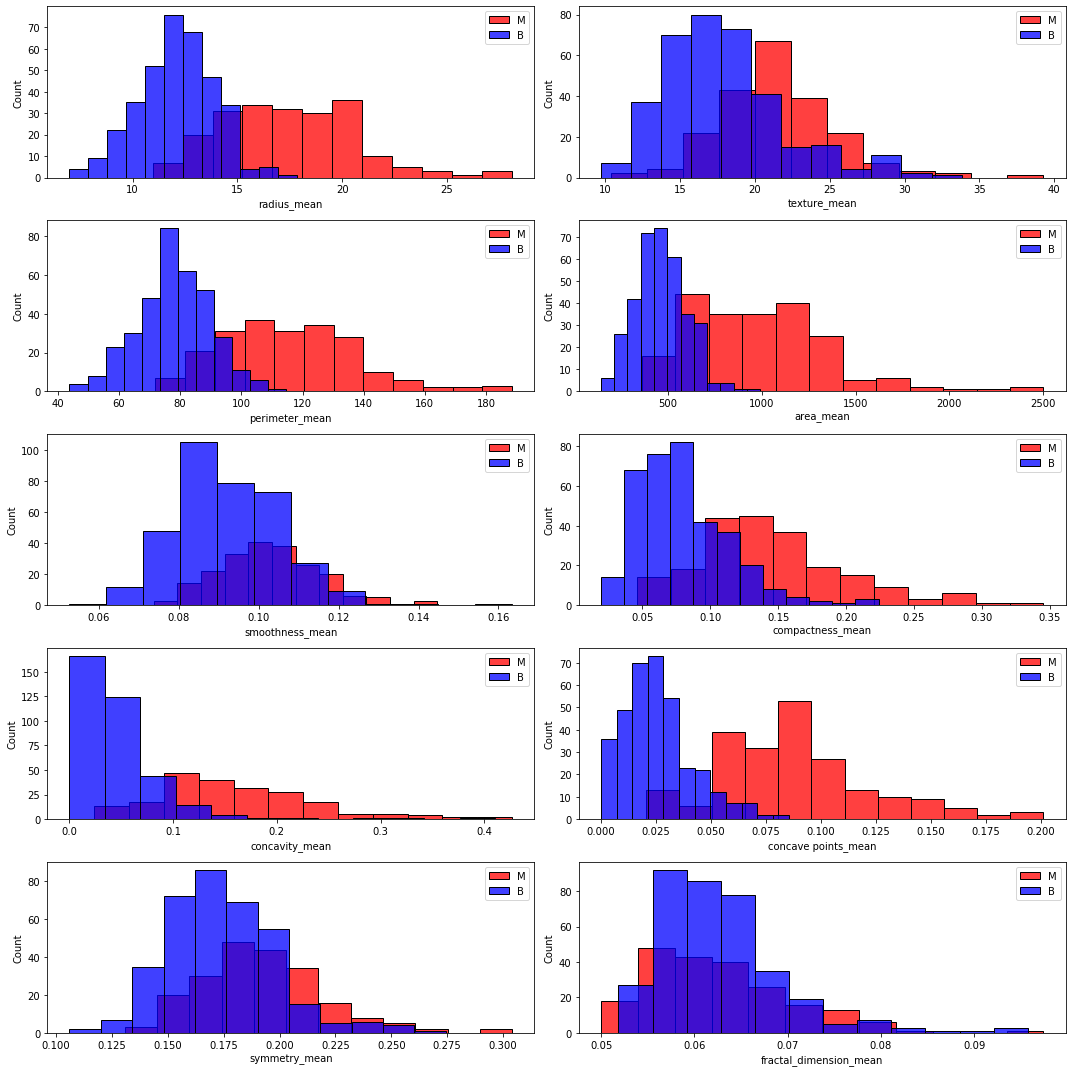

In [117]:
bins = 12
plt.figure(figsize=(15,15))

for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    plt.subplot(rows, 2, i+1)
    sns.histplot(df[df['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.histplot(df[df['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Outra forma de fazer isso poderia ser o uso de diagramas de caixa (**boxplots**).

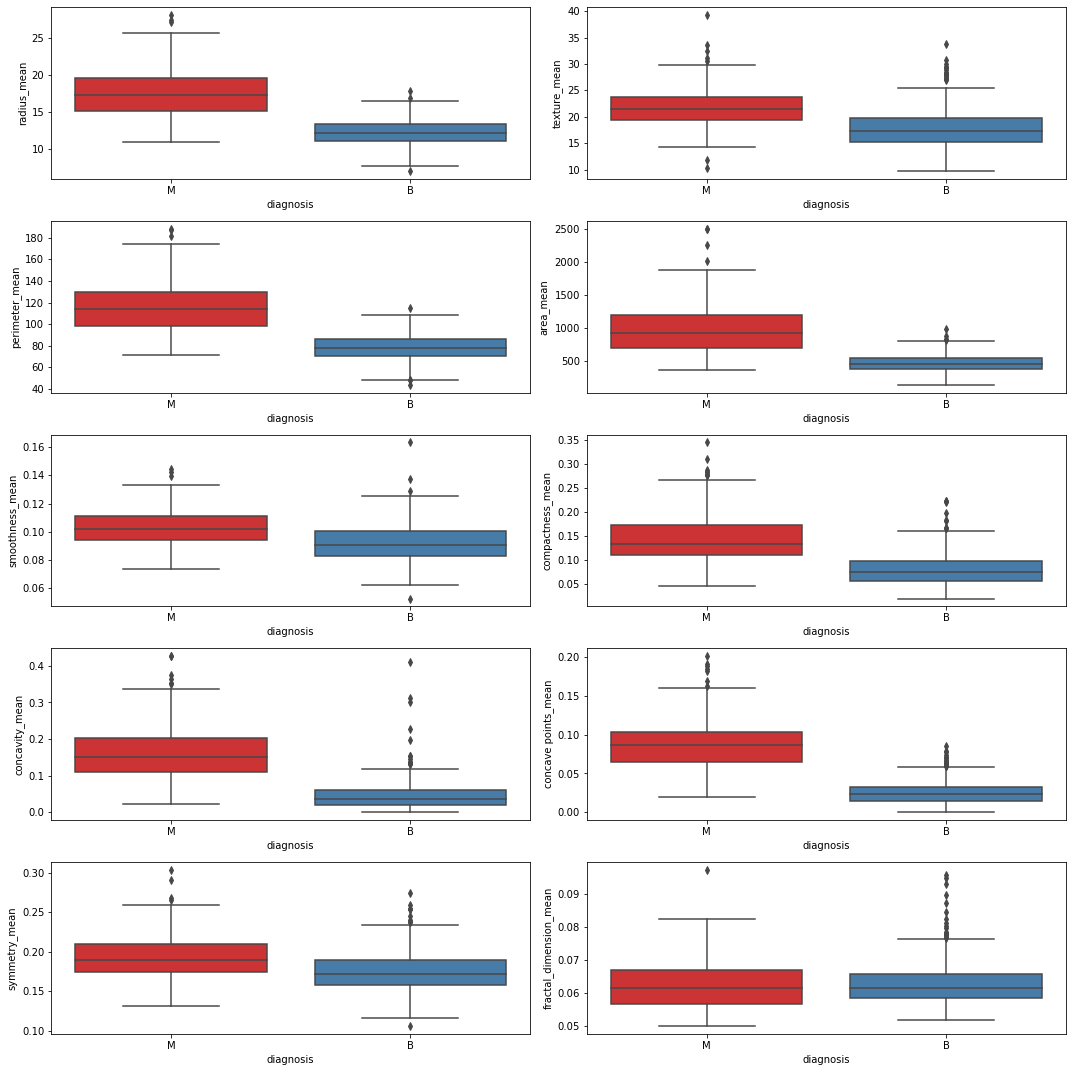

In [118]:
plt.figure(figsize=(15,15))

for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    plt.subplot(rows, 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette="Set1")

plt.tight_layout()
plt.show()

Como vimos acima, algumas das características podem ter, na maioria das vezes, valores que cairão em alguma faixa dependendo do diagnóstico ser **maligno** ou **benigno**. 

Selecionaremos esses **features** para usar na próxima etapa.

In [119]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

## Machine Learning

Nesta seção, testaremos e analisaremos algoritmos de Machine Learning para classificação a fim de identificar se o tumor é maligno ou benigno com base nas características da célula. 

Para isso, usaremos a biblioteca Scikit-learn. As ferramentas necessárias serão carregadas conforme necessário.

O problema com o qual estamos lidando aqui é um problema de classificação.

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time

Os algoritmos irão processar apenas valores numéricos. Por esse motivo, transformaremos as categorias **M** e **B** nos valores **1** e **0**, respectivamente.

In [121]:
diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

E então confirmamos o efeito da mudança.

In [122]:
df.tail(7).T

,562,563,564,565,566,567,568
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
radius_mean,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
texture_mean,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
perimeter_mean,103.400000,143.000000,142.000000,131.200000,108.300000,140.100000,47.920000
area_mean,716.900000,1347.000000,1479.000000,1261.000000,858.100000,1265.000000,181.000000
smoothness_mean,0.104800,0.109900,0.111000,0.097800,0.084550,0.117800,0.052630
compactness_mean,0.208700,0.223600,0.115900,0.103400,0.102300,0.277000,0.043620
concavity_mean,0.255000,0.317400,0.243900,0.144000,0.092510,0.351400,0.000000
concave points_mean,0.094290,0.147400,0.138900,0.097910,0.053020,0.152000,0.000000
symmetry_mean,0.212800,0.214900,0.172600,0.175200,0.159000,0.239700,0.158700


### Usando Todos os Features de Valores Médios (Mean)

Nosso objetivo é construir uma função $y = f(X)$ de forma que o valor de $y$ (**1** ou **0**) seja determinado assim que inserirmos os valores $X$ em $f$. 

A função $f$ será construída pelo algoritmo de Machine Learning com base nos $y$ e $X$ já conhecidos.

Depois de treinar nosso algoritmo de ML, precisamos testar sua **accuracy**. 

Para evitar **[Overfitting](https://en.wikipedia.org/wiki/Overfitting)**, usaremos a função **train_test_split** para dividir os dados em um conjunto de treinamento e teste. O conjunto de teste corresponderá a 20% dos dados totais (`test_size = 0.2`).

Vamos então separar os dados em **features** (X) e **labels** (y) e realizar o **train_test_split**.

Criaremos também duas listas para armazenar a **accuracy** dos algoritmos e **cross-validation**.

In [123]:
X = df.loc[:,features_mean]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracy_all = []
cvs_all = []

A seguir, usaremos três classificadores diferentes, todos com parâmetros padrão. 

Em todos os casos, o procedimento será o seguinte:

- O classificador **clf** é inicializado;
- O classificador **clf** é ajustado com o conjunto de dados de treinamento **X_train** e **y_train**;
- As previsões são encontradas usando **X_test**;
- A accuracy é estimada com ajuda da **cross-validation**;
- A [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) das previsões é então medida.

Ao final, os resultados são apresentados em **%**, juntamente com o tempo total necessário para executar todo o processo.

### Stochastic Gradient Descent

O primeiro estimador que usaremos é o Stochastic Gradient Descent.

In [124]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Tempo de execução: {0:.5} segundos".format(end-start))

SGD Classifier Accuracy: 84.21%
Cross validation score: 75.70% (+/- 25.95%)
Tempo de execução: 0.054651 segundos


### K-Nearest Neighbors

O classificador **Nearest Neighbors** encontra o número predefinido de amostras de treinamento mais próximas em distância do novo ponto e prevê o **label** a partir deles.

In [125]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Tempo de execução: {0:.5} segundos".format(end-start))

Accuracy: 88.60%
Cross validation score: 88.58% (+/- 7.10%)
Tempo de execução: 0.13815 segundos


### Naive Bayes

O algoritmo Naive Bayes aplica o teorema de Bayes com a suposição de independência entre cada par de **features**.

In [126]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Tempo de execução: {0:.5} segundos".format(end-start))

Accuracy: 89.47%
Cross validation score: 91.39% (+/- 5.13%)
Tempo de execução: 0.067064 segundos


### Usando as Features Selecionadas

Nesta etapa, vamos aplicar os mesmos classificadores para os dados com os **features** que foram previamente selecionados com base na análise da etapa 3. 

Para lembrar, esses features são: **radius_mean**, **perimeter_mean**, **area_mean**, **concavity_mean**, **concave points_mean**.

No final, compararemos a **accuracy** da **cross-validation score** para o conjunto selecionado e o conjunto completo de features.

In [127]:
X = df.loc[:,features_selection]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracy_selection = []
cvs_selection = []

### Stochastic Gradient Descent

In [128]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Tempo de execução: %s segundos" % "{0:.5}".format(end-start))

SGD Classifier Accuracy: 89.47%
Cross validation score: 83.84% (+/- 7.84%)
Tempo de execução: 0.094456 segundos


### K-Nearest Neighbors

In [129]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Tempo de execução: %s segundos" % "{0:.5}".format(end-start))

Accuracy: 86.84%
Cross validation score: 88.23% (+/- 7.06%)
Tempo de execução: 0.10333 segundos


### Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Tempo de execução: %s segundos" % "{0:.5}".format(end-start))

Accuracy: 92.98%
Cross validation score: 90.87% (+/- 5.91%)
Tempo de execução: 0.090178 segundos


### Visualizando as Métricas

Usaremos todas as métricas que temos para construir uma **DataFrame** para melhor visualização.

In [131]:
diff_accuracy = list(np.array(accuracy_selection) - np.array(accuracy_all))
diff_cvs = list(np.array(cvs_selection) - np.array(cvs_all))

d = {'accuracy_all':accuracy_all, 'accuracy_selection':accuracy_selection, 'diff_accuracy':diff_accuracy, 
     'cvs_all':cvs_all, 'cvs_selection':cvs_selection, 'diff_cvs':diff_cvs,}

index = ['SGD','KNeighbors','GaussianNB']

dados = pd.DataFrame(d, index=index)

In [132]:
dados

,accuracy_all,accuracy_selection,diff_accuracy,cvs_all,cvs_selection,diff_cvs
SGD,0.842105,0.894737,0.052632,0.757025,0.838426,0.081400
KNeighbors,0.885965,0.868421,-0.017544,0.885779,0.882270,-0.003509
GaussianNB,0.894737,0.929825,0.035088,0.913895,0.908663,-0.005232


Como podemos ver, usando apenas as **features** selecionadas ocorreu um aumento no desempenho de nosso modelo.

### Aperfeiçoando o Melhor Modelo

Nem todos os parâmetros de um classificador são aprendidos com os estimadores. Esses parâmetros são chamados de hiperparâmetros e são passados como argumentos para o construtor do classificador. Cada estimador possui um conjunto diferente de hiperparâmetros, que podem ser encontrados na documentação correspondente.

Podemos buscar o melhor desempenho do classificador amostrando diferentes combinações de hiperparâmetros. Isso será feito com uma pesquisa exaustiva de grid, fornecida pela função **GridSearchCV**.

A busca da grade será feita apenas no melhor modelo que é o Naive Bayes.

In [134]:
from sklearn.model_selection import GridSearchCV

X = df.loc[:,features_selection]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
csv_all = []

### Naive Bayes GridSearchCV

In [138]:
start = time.time()

parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

clf = GridSearchCV(GaussianNB(), parameters, scoring='average_precision', n_jobs=-1, verbose=True)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Tempo de execução: {0:.5} segundos".format(end-start))
print("Melhores parâmetros: {0}".format(clf.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Accuracy: 91.23%
Cross validation score: 95.42% (+/- 8.33%)
Tempo de execução: 1.214 segundos
Melhores parâmetros: {'priors': [0.01, 0.99]}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


Como podemos observar, conseguimos melhor o nosso **Cross validation score**, com os melhores parâmetros encontrados pelo **GridSearchCV**: `{'priors': [0.01, 0.99]}`.